In [1]:
"""MgH+ Polaritonic Potential Energy Surfaces"""

__authors__ = ["Ruby Manderna, Lane Tolley, Jonathan J. Foley, "]
__email__   = ["rmandern@uncc.edu, ptolley1@uncc.edu, jfoley19@uncc.edu, "]
__credits__ = ["Ruby Manderna, Lane Tolley, Jonathan J. Foley"]
__copyright__ = "(c) 2008-2020, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-02-11"


### Import libraries to be used throughout
# basic psi4 library
import psi4
# pyplot
from matplotlib import pyplot as plt
# numpy
import numpy as np
# scipy
from scipy.interpolate import InterpolatedUnivariateSpline
# linear algebra package from numpy
from numpy import linalg as LA
# time-dependent scf library from psi4 for computing excited states and transition dipole moments
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
#from matplotlib import pyplot as plt


_expected_lambda = 309.9604960590
_expected_V = 853.9819621540001
_expected_Eg_val = -200.33018284449852
_expected_Ee_val = -200.18141088127473
_expected_tdm_val = 2.1837588170011095
_expected_deltaE_eV = 4.04823389128266

_expected_H_Rabi = np.array([[-2.00330183e+02,  0.00000000e+00,  0.00000000e+00],
                            [ 0.00000000e+00, -2.00181411e+02,  6.55127645e-03],
                            [ 0.00000000e+00,  6.55127645e-03, -2.00181411e+02]])




n_geoms = 25
_expected_rs = []
for i in range(0,n_geoms):
    _expected_rs.append(1.1 + i*0.1)
    
_expected_Eg_array = np.array([-200.25367486, -200.30835506, -200.34317863, -200.36433935, -200.37609145,
 -200.38129671, -200.38191454, -200.37932951, -200.37454644, -200.36830617,
 -200.36115804, -200.35350922, -200.34566042, -200.33783194, -200.33018284,
 -200.32282542, -200.31583611, -200.30926385, -200.30313622, -200.29746454,
 -200.29224756, -200.28747484, -200.28312913, -200.27918888, -200.27562959])

_expected_Ee_array = np.array([-200.01466921, -200.07666894, -200.11946658, -200.14880628, -200.16864693,
 -200.18166725, -200.18969265, -200.19402683, -200.19564857, -200.19531169,
 -200.19361608, -200.19103812, -200.18795606, -200.18466878, -200.18141086,
 -200.17835946, -200.1756464,  -200.17336483, -200.17157804, -200.17032261,
 -200.16961004, -200.16943208, -200.16976269, -200.17056035, -200.17177513])

_expected_tdm_array = np.array([1.35621453, 1.3765366,  1.41027036, 1.45492843, 1.50865744, 1.56955814,
 1.63570115, 1.70523104, 1.7765825,  1.84846023, 1.91980311, 1.98972481,
 2.05748777, 2.12237872, 2.18375882, 2.24092718, 2.29313572, 2.33957417,
 2.37942975, 2.41195173, 2.43656045, 2.45296981, 2.46122806, 2.46173081,
 2.45518776])

psi4.core.set_output_file('output.dat', False)

## Polaritonic chemistry for a simple diatomic molecule strongly interacting with light

#### Learning Objectives

- Students will be able to define a molecular polariton

- Students will be able to explain how forming molecular polaritons can modify chemical structure and reactivity

- Students will be able to use quantum chemistry calculations to parameterize a Rabi model Hamiltonian for a molecular polariton

- Students will be able to construct polaritonic potential energy surfaces using the Rabi model

- Students will be able to estimate a qualitative relationship between the coupling strength and splitting between polaritonic potential energy surfaces

#### Supplementary learning objective

- Students will be able to apply the rules of 2nd quantized operators to derive the Rabi Hamiltonian matrix

#### Background
Nanostructured materials can be designed to strongly confine light down to nanoscale dimensions, which 
greatly enhances the energy density of light and increases its interaction with molecular excitations.
When molecules through their excitations *strongly* interact with light, new quantum states, called polariton states, emerge that have
properties of light and of matter.  

Consider the image below that shows the MgH+ molecule strongly 
interacting with a nanoconfined photon trapped between two parallel mirrors (aka a cavity). This cavity 
confines a photon with electric field $\vec{E}$ aligned with the transition dipole moment $\vec{\mu}_{i\rightarrow f}$  connecting the ground to first singlet excited state of MgH+.  When the energy of the trapped photon ($\hbar \omega$) matches this excitation energy in a particular region of the MgH+ potential energy surface, energy can be 
rapidly exchanged between the molecular excitation and the cavity.  We can think of this exchange as cylcing between  the molecule absorbing the trapped photon and becoming excited, and relaxing back to the ground-state and emitting the a photon which becomes trapped in the cavity.  When this cycling is rapid, as is the case when the interaction 
is strong, the cycling of energy makes it impossible to distinguish between the quantum state of the excited molecule and the quantum state of the photon localized in the cavity.  Rather, we think of this situation as a hybrid state that is part light part matter, and we call this state a polariton.  One fascinating feature of molecular polaritons
is that their potential energy surfaces may be dramatically different than the potential energy surfaces of their
molecular constituents.  Consequently, new and different chemical reactivity may be realized by putting molecules in cavities!  This notebook will explore the reshaping of the potential energy surfaces of the simple diatomic
MgH+ by placing it in a cavity.

<img src="data/MgH_polariton.png" width=300 height=300 />
 



##### What is a molecular polariton?

A *molecular polariton* can be understood as quantum state that mixes the quantum states of a photon and the quantum states of a molecule.  The two criteria for forming a molecular polariton are that

1. The photon energy should match the transition energy between molecular quantum states

2. The energy scale of the interaction between the photon and the molecular transition should be large compared to dissipation energy scales in the individual molecular and photonic systems




**Question 1** Let's consider the first criteria for electronic transitions in the MgH+ system.  The the relevant electronic transition (ground to first singlet excited state) energy is on the order of 4 eV.  What photon wavelength can be used to form a molecular polariton with this electronic transition assuming a transition energy of 4 eV?

*Answer goes here!* 

*Hint:* $ E = \hbar \omega $ and $ \lambda_p = \frac{2\pi c}{\omega} $ and for the conversion between atomic units of length and nanometers, $1 \; {\rm nm} = 18.8972 \: {\rm a.u.}$.

In [2]:
transition_energy = 4.0 # g -> e transition energy in eV

hbar_eV_s = 6.582119569e-16 # -> hbar in eV * s

c_SI = 299792458 # -> speed of light in m / s

m_to_nm = 1e9 # -> conversion between meters and nanometers

# ==> Write code to compute wavelength in meters here <==
lambda_m = hbar_eV_s * 2 * np.pi * c_SI / transition_energy

# ==> Write code to convert wavelength from meters to nanometers here... store in variable lambda_nm <==
lambda_nm = lambda_m * m_to_nm

print(f'The photon wavelength is {lambda_nm:.3f} nm')

The photon wavelength is 309.960 nm


Let's consider the second criteria that the interaction energy scale must be large compared to the dissipation energy scales of the individual molecular and photonic system. Specifically, we have the criteria 
$$ 4g > \gamma \tag{1}$$ 

where $g$ represents the interaction energy rate between the molecular transition and the photon and $\gamma$ represents the dissipation rate of the molecular excitation and the photon.  Usually the dissipation rate of the photon is much faster than the dissipation of the molecular excitation, so $\gamma$ can be approximated as the inverse of the lifetime of the occupation of the photon in the cavity.  

We can define $g$ as follows:

$$ g = {\bf A} \cdot \mu_{ge}, \tag{2}$$
where ${\bf A}$ is related to the electric field of the photon and
has a magnitude defined as 
$$ A = \sqrt{\frac{\omega}{2 \epsilon_0 V}}, \tag{3}$$
$\mu_{eg}$ is the transition dipole moment associated with the electronic transition, $\omega$ is the
frequency of the photon, $\epsilon_0$ is the permittivity of vacuum, and
$V$ represents the volume of the cavity that confines the photon (and molecule).  Here we can
see that for a given value of the transition dipole moment, increasing the confinement of the photon by decreasing $V$ increases the interaction energy scale by increasing the fundamental coupling strength $A$. 

**Question 2**
If we can assume that (in atomic units) $\mu_{ge} = 1$, $\omega = 0.1469$, and $\gamma = 0.0016$, what is the value of $A$ required to satisfy $ 4g = \gamma $?  Store this value in the variable `A_au`.






**Note** Although both ${\bf A}$ and $\mu_{eq}$ are technically vector quantities, in this excercise we are considering only the component along the $z$ axis, so we will treat them as scalars from here on out!

*Answer goes here!* 

*Note* In atomic units, $\frac{1}{\epsilon_0} = 4 \pi$

In [3]:
mu_ge_au = 1 # -> transition dipole moment in atomic units 

gamma_au = 0.0016 # -> photon dissipation rate in atomic units

omega_au = 0.1469 # -> photon frequency in atomic units

au_to_nm = 0.0529 # -> conversion factor for atomic units of length to nanometers

# ==> Write code to compute A_au (in atomic units) here <== 
A_au = gamma_au / (4 * mu_ge_au)


# ==> Pre-written: Convert A to volume in atomic units to volume in nm^3 <==
V_au = omega_au * np.pi * 2 / A_au ** 2
V_nm = V_au * au_to_nm ** 3

print(f'The magnitude of A is {A_au:.3e} atomic units')
print(f'The cavity volume is {V_nm:.3f} nm^3')

assert np.isclose(V_nm, _expected_V)

The magnitude of A is 4.000e-04 atomic units
The cavity volume is 853.982 nm^3


#### Model system
We will consider the diatomic cation MgH+ in a cavity chosen such that it can trap a photon with a 
frequency of approximately $\hbar \omega = 4.0$ eV. 
We will compute the singlet ground state and first singlet excited state potential energy surfaces along the
Mg-H+ stretch coordinate $R$ using density functional theory (DFT) and time-dependent density functional theory (TDDFT), respectively.  DFT provides an efficient method for computing the ground-state energy of a quantum mechanical system using the electron density (rather than the wavefunction) as the primary variable, and TDDFT provides an efficient method for estimating the energies and properties of excited-states starting from the DFT ground state.    We denote the ground 
state ket as $|g\rangle$ with an associated energy eigenvalue $E_g(R)$, and the excited-state $|e\rangle$
with associated energy eigenvalue $E_e(R)$ where $R$ is the bondlength.  The transition dipole
moment between $|g\rangle$ and $|e\rangle$ will also be computed using TDDFT, yielding $\mu_{ge}(R)$. 
While
the transition dipole moment and the electric field are vector quantities, in this case $\mu_{ge}(R)$ is oriented along the internuclear coordinate ($R$), and so for simplicity we consider an electric field oriented soley along
$R$ as well and treat both quantities as scalars.

We will consider two quantum states for the photon - no photon in the cavity, denoted by $|0\rangle$, and 1 photon in the cavity $|1\rangle$.  The photon has an energy of $\hbar \omega$. At the same time, we will allow for the molecule to be in its electronic ground state $|g\rangle$ or its first electronic excited state $|e\rangle$.  
This leads to the following basis states for the composite system:

$|g,0\rangle \rightarrow$ The molecule is in the ground state and there is no photon in the cavity.

$|g,1\rangle \rightarrow$ The molecule is in the ground state and there is one photon in the cavity.

$|e,0\rangle \rightarrow$ The molecule is in its first electronic excited state and there is no photon in the cavity.

We will neglect the $|e,1\rangle$ state for simplicity, and if desired, it can be shown that its inclusion does not impact the results.

In this 3-state basis, we will model this system with a generalized Rabi Hamiltonian that can be written as:
\begin{equation}
    {\bf H} =
    \begin{pmatrix}
    E_g(R)  & 0 & 0 \\
    0 & E_g(R) + \hbar \omega &   A \cdot \mu_{ge}(R) \\
    0 &  A \cdot \mu_{ge}(R) & E_e(R)
    \end{pmatrix}. \tag{4}
\end{equation}
where $E_g(R)$ denotes the ground-state potential energy surface, i.e. the energy of state $|g\rangle$ at bondlength $R$, $E_e(R)$ denotes the potential energy surface of the first excited state (energy of state $|e\rangle$ at bondlength $R$), and $\mu_{ge}(R)$ denotes the transition dipole moment between state $|g\rangle$ and $|e\rangle$.  Applying second quantized operators to derive this Hamiltonian matrix is supplementary learning outcome; interested students are directed to [Derivation](#Derivation) cell for the derivation.

We can see that the molecular and photonic basis states interact with each other (i.e. the Hamiltonian in this basis is not diagonal).  We can diagonalize this matrix to yield the *polaritonic* states.  We will 
use the following nomenclature for these eigenpairs that define these polaritonic states:

$E_g|\psi_g\rangle \rightarrow$ The ground-state energy and eigenstate of the interacting system, which is approximately equal to $E_g$ and $|g,0\rangle$ from before.  This corresponds to the lowest eigenvalue of the Rabi Hamiltonian.

$E_{LP}|\psi_{LP}\rangle \rightarrow$ The lower-polariton energy and eigenstate.  The lower-polariton eigenstate is a linear 
combination of the $|g,1\rangle$ and $|e,0\rangle$ states.  This corresponds to the second-lowest eigenvalue of the Rabi Hamiltonian.

$E_{UP}|\psi_{UP}\rangle \rightarrow$ The upper-polariton energy and eigenstate.  The upper-polariton eigenstate is also a linear 
combination of the $|g,1\rangle$ and $|e,0\rangle$ states.  This corresponds to the third-lowest eigenvalue of the Rabi Hamiltonian (or highest eigenvalue in the case we are using only the 3 basis states defined above).



##### Procedure
We will build and diagonalize this matrix across a range of bondlength values ($R$), and the 
resulting eigenvalues will comprise the polaritonic potential energy surfaces.  The resulting 
eigenvectors will comprise the polaritonic energy eigenstates.  We will utilize the `psi4` package to compute
$E_g(R)$, $E_e(R)$, and $\mu_{ge}(R)$ to be used in the model Hamiltonian above.

We will import psi4 to have access to the DFT engine for computation of ground-state properties, and the scf_response library of psi4 to have access to TDDFT methods for obtaining excited-state properties.  We will also import numpy and scipy libraries to help with constructing and diagonalizing the Rabi Hamiltonian.

To compute $E_g(R)$, $E_e(R)$, and $\mu_{ge}(R)$, we will use DFT/TDDFT at the B3LYP/cc-pVDZ level for 25 different geometries from $R = 1.1$ to $R = 3.5$ Angstroms.

The scan of different $R$ values uses similar syntax as has been demonstrated in other Psi4Education labs, see for example the lab on the [calculation of spectroscopic constants](https://github.com/Psi4Education/psi4education/blob/master/labs/spectroscopic_constants/spectroscopic_constants_student.ipynb).

Extracting the excitation energy and the transition dipole moment requires that we run the `tdscf_excitations` method from the psi4 package, which we have explicitly imported.  This method returns a dictionary containing different information about the excited-state energies and properties. 

##### The tdscf_excitations method and dictionary
The syntax for computing singlet excited-state properties with the tdscf_excitations method is as follows:

`res = tdscf_excitations(wfn, states=n, triplets='None')`

where `wfn` is the wavefunction object that can be obtained from a prior ground-state calculation, `states=n` specifies the number `n` of excited-states you wish to compute, `triplets='None'` specifies that only singlet exited states will be obtained, and `res` is the name specified for the nested dictionary that the method returns to store the excited-state information.  

Dictionaries are used to store data values in key:value pairs, and nested dictionaries have multiple dictionaries inside a dictionary.  This construction is useful for the excited-state calculations because there are many excited states, each having properties that can be specified by the same key.   

We are interested in two keys for our calculation.
The key `"EXCITATION ENERGY"` can be used to access the excitation energy from the ground state to a given excited state obtained from the calculation, and the key `"ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"` can be used to access the transition dipole moments associated with the computed states (ground-to-excited state only).  Because we are interested in these properties only for the first excited state, we will access them as follows:

`res[0]["EXCITATION ENERGY"]`: $E_e(R) - E_g(R)$

`res[0]["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"]`: $\mu_{ge}(R)$.

Information about the second excited-state would be obtained from keys associated with `res[1]['KEY']`, etc.

To see all of the keys of the nested dictionary called `res`, you can type `res[0].keys()`.   For a more general discussion of nested dictionaries, see [here](https://www.programiz.com/python-programming/nested-dictionary).


In [4]:
# set basis
psi4.set_options({
    'basis':'cc-pVDZ'
})

# set the number of electronic states... this is the ground state + n_states more
# we will get 1 excited-state
n_states = 1

# set the number of bond lengths to compute the stretch along
n_geoms = 25

# initialize geometry list
geoms = []

# initialize energy list... note
# there will be the ground state energy + n_states excited state energies
Es = np.zeros((n_states+1, n_geoms))

# initialize z-component of transition dipole list
mu_z = np.zeros((n_states, n_geoms))

# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.1 + i*0.1)

# loop over bond lengths
ctr = 0
for i in rs:
    # generate the MgH+ molecule using a z-matrix and set the Mg-H+ bond length
    mol = psi4.geometry("""
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })  
   
    # calculate and save the ground-state energy and wavefunction
    e, wfn = psi4.energy("b3lyp/cc-pVDZ", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies and save them to a dictionary called 'res'
    res = tdscf_excitations(wfn, states=n_states, triplets = "NONE")
    
    # parse the excitation energies from the 'res' dictionary 
    delta_e = [r["EXCITATION ENERGY"] for r in res]
    
    # parse the transition dipole moment from the 'res' dictionary
    mu = [r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"] for r in res]
    Es[0,ctr] = e
    
    # store the results to the respective arrays
    for j in range(0, n_states):
        Es[j+1,ctr] = e + delta_e[j]
        # we only want the z-component which is index 2
        mu_z[j,ctr] = np.absolute(mu[j][2])

    
    # increment the counter!
    ctr += 1
    



In [5]:
# Take slices of information for Eg, Ee, and mu_eg only
Eg_array = np.copy(Es[0,:])
Ee_array = np.copy(Es[1,:])
tdm_array = np.copy(mu_z[0,:])


assert np.allclose(Eg_array, _expected_Eg_array)
assert np.allclose(Ee_array, _expected_Ee_array)
assert np.allclose(tdm_array, _expected_tdm_array)

In [6]:
# This will print all of the keys associated with the `res` dictionary.
print(res[0].keys())

dict_keys(['EXCITATION ENERGY', 'ELECTRIC DIPOLE TRANSITION MOMENT (LEN)', 'OSCILLATOR STRENGTH (LEN)', 'ELECTRIC DIPOLE TRANSITION MOMENT (VEL)', 'OSCILLATOR STRENGTH (VEL)', 'MAGNETIC DIPOLE TRANSITION MOMENT', 'ROTATORY STRENGTH (LEN)', 'ROTATORY STRENGTH (VEL)', 'SYMMETRY', 'SPIN', 'RIGHT EIGENVECTOR ALPHA', 'LEFT EIGENVECTOR ALPHA', 'RIGHT EIGENVECTOR BETA', 'LEFT EIGENVECTOR BETA'])


Let's plot the ground- and excited-state potential energy surfaces for MgH+ just computed above.

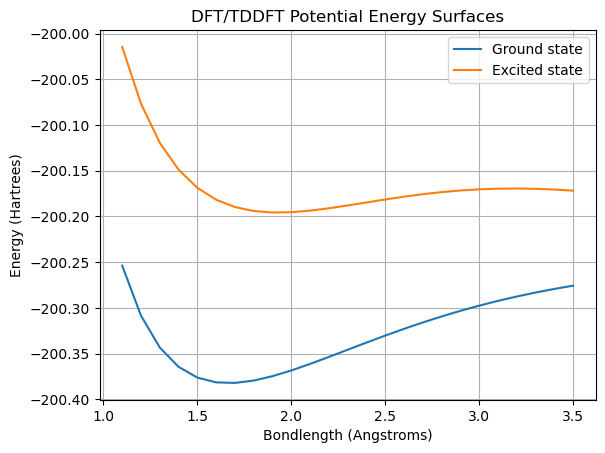

In [7]:

plt.plot(rs,Eg_array, label='Ground state')
plt.plot(rs,Ee_array, label='Excited state')
plt.legend()
plt.xlabel('Bondlength (Angstroms)')
plt.ylabel('Energy (Hartrees)')
plt.title('DFT/TDDFT Potential Energy Surfaces')
plt.grid(True)
plt.show()

#### Building the Rabi model Hamiltonian 

1. Fit each surface to a spline

2. Define functions that build the Rabi Hamiltonian and extract the eigenstates from them.  For reasons of convenience with the plotting widget, we will create two almost identical functions that extract the lower-polariton and upper-polariton roots separately. 

3. (Separate notebook) Define a widget that allows the display of polaritonic potential energy surfaces with variable values of the coupling strength $g$.  

##### Step 1: Fitting a spline
We will fit a cubic spline to the data obtained for the ground- and excited-state potential energy surfaces ($E_g(R)$ and $E_e(R)$) obtained from the TDDFT calculations.  A cubic spline is a simple model function of the form $f(R) = a + bR + cR^2 + dR^3$ that allows estimation of the potential energy curves at arbitrary values of $R$ within the finite range scanned by the *ab initio* calculations.  We will do the same for the transition dipole moment, $\mu_{ge}(R)$.

The syntax for generating a cubic spline is as follows:

`spline = InterpolatedUnivariateSpline(x_values, y_values, k=3)`

where `x_values` is a list or numpy array containing the independent variable data, `y_values` is a list or numpy array containing the corresponding dependent variable data, `k=3` indicates a cubic spline, and `spline` is the spline object returned by the `InterpolatedUnivariateSpline` method.  

Recall that the independent variable data are the bondlengths $R$ stored in the numpy array `rs`, and the dependent variable data are the ground- and excited-state potential energy surface data stored in the `Es` array.  The transition dipole moment data is stored in the array `mu_z`. 

*Note on units* The bondlength data is stored in Angstroms, whereas the energies and transition dipole moments are all stored in atomic units.

**Question 3**  Fit a spline called `Eg_spline` to the ground-state potential energy surface data, a spline called `Ee_spline` to the excited-state potential energy surface data, and a spline called `mu_spline` to the transition dipole moment data.


In [8]:
# fit all surfaces to a spline
# ==> Code to fit splines goes here! <== #
Eg_spline = InterpolatedUnivariateSpline(rs, Eg_array, k=3)
Ee_spline = InterpolatedUnivariateSpline(rs, Ee_array, k=3)
mu_spline = InterpolatedUnivariateSpline(rs, tdm_array, k=3)

Once the splines have been defined, they can be evaluated at a particular value(s) of $R$ using the following syntax `spline(R)`.  Note if you pass the spline a numpy array of $R$ values, it will return a numpy array of 
dependent variable values evaluated at each value of the $R$ array.  

In the following blocks, add code to evaluate `Eg_spline`, `Ee_spline` and `mu_spline` at `R_val = 2.5` Anstroms; store the values to variables named `Eg_val`, `Ee_val`, and `tdm_val` respectively.

In [9]:
# ==> Code to evaluate Eg_spline, Ee_spline, and mu_spline at R_val = 2.5 Angstroms goes here! <== #
R_val = 2.5

Eg_val = Eg_spline(R_val)

Ee_val = Ee_spline(R_val)

tdm_val = np.absolute(mu_spline(R_val))

**Question 4** What is the transition energy in (expressed in atomic units and in electron volts) between the ground and first excited state at $R = 2.5$ Angstroms?  

*Answer in atomic units goes here!* 

*Answer in electron volts goes here!*

*Hint* The conversion factor between atomic units of energy and electron volts is $27.211 \frac{{\rm eV}}{{\rm atomic \: unit}}$.  Store the transition energy in a variable called `transition_energy_eV`.

In [10]:
# conversion factor for au -> eV
au_to_eV = 27.211

# ==> Code to compute transition energy in atomic units and convert to eV goes here! <== #
transition_energy_au = Ee_val - Eg_val
transition_energy_eV = transition_energy_au * au_to_eV
print(transition_energy_au)
print(transition_energy_eV)

0.14877198495449306
4.048234482596711


**Checking your results:** The next cell will check the values you obtained from your splines.  We will use an `assert` statement to compare your computed values to the expected values. The `assert` statement will pass if the comparison returns true, and will fail if the comparison returns false.  

**If one or more `assert` statements fail, you should go back and check your code in the last few blocks!**  

The comparison is performed by the numpy function `isclose()`.  For more information about the `isclose()` function, see [here](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html).  

In [11]:
assert np.isclose(Eg_val, _expected_Eg_val)
assert np.isclose(Ee_val, _expected_Ee_val)
assert np.isclose(tdm_val, _expected_tdm_val)
assert np.isclose(transition_energy_eV, _expected_deltaE_eV)



##### Step 2: Building the Rabi Hamiltonian

Next we will define a function that will build and return the Rabi Hamiltonian (Eq. (4)).  We will pass 
5 arguments to this function:

`A_value` : Electric field strength $A$ as defined in Eq. (3)

`omega_value` : Photon frequency $\omega$ that appears in the diagonals of Eq. (4)

`r_value` : An $R$ value at which the Rabi Hamiltoninan will be evaluated

`g_spline` : A spline fit to the ground state potential energy surface as a function of $R$

`e_spline` : A spline fit to the excited state potential energy surface as a function of $R$

`tdm_spline` : A spline fit to the transition dipole moment surface as a function of $R$

A template for this function follows:

```
def Rabi_Hamiltonian(lambda_value, omega_value, r_value, g_spline, e_spline, tdm_spline):
    """Function to compute the Rabi Hamiltonian

    Arguments
    ----------
    A_value : float
        electric field strength
        
    omega_value : float
        photon energy
        
    r_value : float
        value of the bondlength
        
    g_spline : scipy spline object
        spline that is fit to the ground-state potential energy surface
        
    e_spline : scipy spline object
        spline that is fit to the excited-state potential energy surface
        
    tdm_spline : scipy spline object
        spline that is fit to the transition dipole moment surface
        
    Returns
    -------
    H : numpy array
        3x3 Rabi Hamiltonian matrix
    """

    # create 3x3 numpy array to store the Rabi Hamiltonian
    H = np.zeros((3,3)) 
    
    # ==> Code to compute elements of the Rabi Hamiltonian <== #
    
    # return the Hamiltonian
    return H

```

In [12]:
def Rabi_Hamiltonian(A_value, omega_value, r_value, g_spline, e_spline, tdm_spline):
    """Function to compute the Rabi Hamiltonian

    Arguments
    ----------
    A_value : float
        electric field strength
        
    omega_value : float
        photon energy
        
    r_value : float
        value of the bondlength
        
    g_spline : scipy spline object
        spline that is fit to the ground-state potential energy surface
        
    e_spline : scipy spline object
        spline that is fit to the excited-state potential energy surface
        
    tdm_spline : scipy spline object
        spline that is fit to the transition dipole moment surface
        
    Returns
    -------
    H : numpy array
        3x3 Rabi Hamiltonian matrix
    """
    
    # initialize 3x3 Hamiltonian matrix
    H = np.zeros((3,3))
    
    # diagonal entries
    H[0,0] = g_spline(r_value)
    H[1,1] = g_spline(r_value) + omega_value
    H[2,2] = e_spline(r_value)
    
    # off-diagonal entries
    H[1,2] = A_value * tdm_spline(r_value)
    H[2,1] = A_value * tdm_spline(r_value)
    
    # return the matrix
    return H


**Question 5** Evaluate the Rabi Hamiltonian with $A = 0.003$ atomic units, $R = 2.5$ Angstroms, 
and $\omega$ defined such that it matches the transition energy at this bondlength.  Store the resulting
matrix to a variable named `H_Rabi`.

*Hint:* Your $\omega$ value should be in atomic units.

In [13]:
A_value = 0.003

H_Rabi = Rabi_Hamiltonian(A_value, transition_energy_au, R_val, Eg_spline, Ee_spline, mu_spline)


**Checking your results:** The next cell will check the Hamiltonian computed in the last block.

**If this `assert` statements fail, you should go back and check the code in your Rabi_Hamiltonian function and the values of the arguments you passed to this function!**  

In [14]:
assert np.allclose(H_Rabi, _expected_H_Rabi)

**Step 3: Compute and plot polariton potential energy surfaces**

We will compute and plot the polaritonic potential energy surfaces for $A = 0.003$ atomic units.  This will help us to vizualize the so-called Rabi splitting that occurs between 
the surfaces at a particular value of the bondlength $R_{deg}$, where we define $R_{deg}$ as the bondlength 
at which the following is satisfied for a particular value of the photon energy $\omega_0$:

$$ E_g(R_{deg}) + \hbar \omega_0 = E_e(R_{deg}) \tag{5}$$.

If we set $\omega_0$ to be equal to the transition energy at $R = 2.5$ Angstroms as before, then we have 
$R_{deg} = 2.5$ Angstroms by definition. As we worked out in an earlier cell, this value of $\omega_0$ would
correspond to approximately $0.1487$ atomic units or $4.048$ eV.  We will use this value for $\omega$ for the rest of this notebook.

We already have a function that will build the Rabi Hamiltonian as a function of the fundamental coupling strength, the photon energy, and the bondlength value.  The next step is to build a function that will build and diagonalize
this matrix for a range of bondlengths to return the so-called lower- and upper-poloriton potential energy surfaces ($E_{LP}(R)$ and $E_{UP}(R)$).  We will use the `eigh` function of numpy's linear algebra package (given the alias `LA` in our import statement at the top of the notebook) to diagonalize the Hamiltonian and store the eigenvalues.  The syntax follows:

`vals, vecs = LA.eigh(matrix)`

where `vals` are the eigenvalues, `vecs` are the eigenvectors, and `matrix` is the Hermitian matrix.

The following function `polariton_surfaces` will compute and return $E_{LP}(R)$ and $E_{UP}(R)$ in this way.

In [15]:
def polariton_surfaces(A_value, omega_value, r_values, g_spline, e_spline, tdm_spline):
    """Function to compute the lower- and upper-polariton potential energy surfaces

    Arguments
    ----------
    A_value : float
        electric field strength
        
    omega_value : float
        photon energy
        
    r_value : float
        value of the bondlength
        
    g_spline : scipy spline object
        spline that is fit to the ground-state potential energy surface
        
    e_splien : scipy spline object
        spline that is fit to the excited-state potential energy surface
        
    tdm_spline : scipy spline object
        spline that is fit to the transition dipole moment surface
        
    Returns
    -------
    E_LP_of_R : numpy array
        lower-polariton potential energy surface defined at each value of r_values
        
    E_UP_of_R : numpy array
        upper-polariton potential energy surface defined at each value of r_values
    """
    # initialize lp and up surfaces
    lp_surface = np.zeros_like(r_values)
    up_surface = np.zeros_like(r_values)
    
    # loop through r values, build Rabi Hamiltonian, diagonalize, and store!
    
    for i in range(0, len(r_values)):
        
        # if there is no coupling, then we don't need to diagonalize anything
        if A_value == 0:
            lp_surface[i] = g_spline(r_values[i]) + omega_value
            up_surface[i] = e_spline(r_values[i])
        
        # otherwise build Hamiltonian and diagonalize
        else:
            # Build the Rabi Hamiltonian
            H = Rabi_Hamiltonian(A_value, omega_value, r_values[i], g_spline, e_spline, tdm_spline)
            
            # diagonalize
            vals, vecs = LA.eigh(H)
            
            # store lp and up values
            lp_surface[i] = vals[1]
            up_surface[i] = vals[2]
    
    # return the surfaces
    return lp_surface, up_surface


In [16]:
# run this cell to compute the polariton PES
lp_surface, up_surface = polariton_surfaces(A_value, transition_energy_au, rs, Eg_spline, Ee_spline, mu_spline)

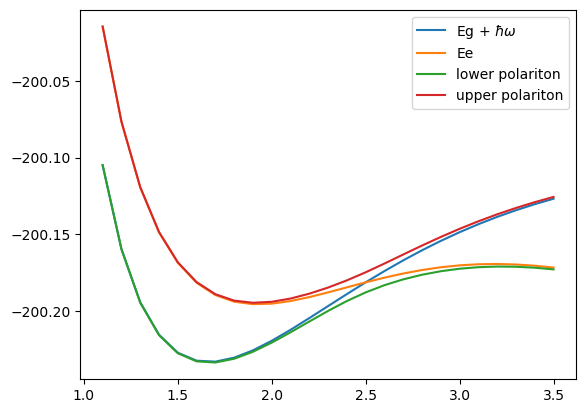

In [17]:
plt.plot(rs, Eg_spline(rs)+transition_energy_au, label="Eg + $\hbar \omega$")
plt.plot(rs, Ee_spline(rs), label="Ee")
plt.plot(rs, lp_surface, label="lower polariton")
plt.plot(rs, up_surface, label="upper polariton")
plt.legend()
plt.show()

<a id=’Derivation’></a>
### Derivation

We will consider two quantum states for the photon - no photon in the cavity, denoted by $|0\rangle$ with associated energy eigenvalue $0$
and one photon in the cavity, denoted by $|1\rangle$ with associated energy eigenvalue $\hbar \omega$.  Note that essentially shifts the photon Hamiltonian by the zero-point energy $\hbar \frac{\omega}{2}$.
We will model this system with a generalized Rabi Hamiltonian that can be written as:

$$ \hat{H} = E_g(R) |g\rangle \langle g| + E_e(R) |g\rangle \langle g| + 
\hbar \omega \hat{b} \hat{b}^{\dagger}  + \hbar {\bf A} \cdot \mu_{ge}(R) \left(\hat{b} + \hat{b}^{\dagger} \right) \left(|g\rangle \langle e| +  |e\rangle \langle g|\right). $$
The polaritonic potential energy surfaces may be obtained by building a Hamiltonian matrix in the following basis and diagonalizing as a function of the bond length $R$: $ |\phi\rangle \in \{|g,0\rangle , |g,1\rangle , |e,0\rangle, |e,1\rangle \}. $

#### Review of Dirac Bra-Ket notation
We have used Dirac's bra-ket notation for both the electronic and the photonic states.  In this notation,
$|n\rangle = \psi_n$ is known as the *ket* for state $n$, 
and $\langle m| = \psi_m^*$ is known as the *bra* for state $m$.  This applies
to both electronic and photonic states, where we are specifically
using the notation $|g\rangle$ to denote the ground electronic ket, $|e\rangle$ to denote
the first-excited electronic ket, $|0\rangle$ to denote the 0-photon ket, and $|1\rangle$ to 
denote the 1-photon ket.

An important rule in this notation is the
following:

$$ \langle n | m \rangle = \int \psi^*_n \psi_m d\tau = \delta_{nm} $$

where the Kronicker delta function $\delta_{nm}$ is equal to 1 if $n = m$ and 0 otherwise.
We can use this rule to compute different terms in the Hamiltonian matrix.


#### Review of rules for the projection operators for electronic states

The projection operators for molecular electronic states are denoted
$|n\rangle \langle m|$ where again $|n\rangle = \psi_n$ is known as the *ket* for electronic state $n$, 
and $\langle m |= \psi_m^*$ is known as the *bra* for electronic state $m$. 
In this notebook, we will restrict the electronic states to the ground state (denoted $|g\rangle$) 
and the first excited state (denoted $|e\rangle$).  
Let us examine the contribution that arises from the $E_g(R) |g\rangle \langle g|$
term in the Hamiltonian between the basis state $|g,0\rangle = |g\rangle |0\rangle$
on the bra and the ket:

\begin{align}
& \langle g|\langle0| \left( E_g(R) |g\rangle \langle g|\right)| g\rangle  |0\rangle \\
= & \langle 0|0\rangle \langle g | \left( E_g(R) |g\rangle \langle g|\right)| g\rangle \\
=& 1 \cdot \langle g | E_g(R) |g\rangle \cdot 1 \\
&= E_g(R)  \langle g | g \rangle \\
&= E_g(R)
\end{align}
where we have used the fact that the projection operator $|g\rangle \langle g|$
only acts on the electronic states, so we were able to factor out our photonic bra
and kets $\langle 0 | 0 \rangle = 1$, and then we were also able 
to bring the ground-state energy eigenvalue $E_g(R)$ outside the integral in the second-to-last step just leaving $E_g(R) \langle g | g \rangle = E_g(R)$.

##### Question 1: Combine these rules to evaluate the following:
\begin{align}
\langle g| \left(E_g(R) |g\rangle \langle g|\right)|e\rangle \\
\langle e| \left(E_g(R) |g\rangle \langle g|\right)|e\rangle\\
\langle g| \left(E_e(R) |e\rangle \langle e|\right)|e\rangle \\
\langle e| \left(E_e(R) |e\rangle \langle e|\right)|e\rangle \\
\langle e| \left({\bf A} \cdot \mu_{eg} |e\rangle \langle g|\right)|e\rangle \\
\langle e| \left({\bf A} \cdot \mu_{eg} |e\rangle \langle g|\right)|g\rangle
\end{align}

The photonic raising operators generally obey $\hat{b}^{\dagger}|n\rangle = \sqrt{n+1}|n+1\rangle$,
where $n$ denotes the number of photons that occupy the cavity.  
For the basis states in question, we have the following:
\begin{align}
\hat{b}^{\dagger}|0\rangle = |1\rangle \\
\hat{b}^{\dagger}|1\rangle = \sqrt{2}|2\rangle
\end{align}
where $|\rangle$ denotes a fermionic Fock vacuum state.

The photonic lowering operators generally obey $\hat{b}|n\rangle = \sqrt{n}|n-1\rangle$, so for the
basis states in question, we have:
\begin{align}
\hat{b}|1\rangle = |0\rangle \\
\hat{b}|0\rangle = 0.
\end{align}

##### Question 2: Combine the molecular and photonic creation and annihilation operator rules to derive elements of the Hamiltonian matrix

This matrix as a function of the bond-length $R$ is as follows:
\begin{equation}
{\bf H}(R)
  \mbox{=} 
  \begin{array}{c|cccc}
       & |g,0\rangle & |g,1\rangle & |e,0\rangle \\
    \hline
    \langle g,0| & E_g(R)   &     0   & 0  \\
    \langle g,1| & 0        &   E_g(R) +  \hbar \omega  & \hbar {\bf A} \cdot \mu_{eg} (R) \\
    \langle e,0| & 0        &    \hbar {\bf A} \cdot \mu_{eg}  & E_e(R)+\hbar \omega\\
  \end{array}
\end{equation}